# 3. Keras- Pneumonia Prediction (Kaggle)

Sources: 
1. https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
2. https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/    
3. https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
4. https://docs.opencv.org/master/d4/da8/group__imgcodecs.html 

Below I have used the kaggle dataset for Pneumonia prediction. This was part of the kaggle competition that I have linked in the sources above.

In [1]:
# import modules of interest

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import os

In [3]:
pwd

'/Users/charlesvalenciaevans/Documents/Coding/Github/Potentials/Jeremiah/2 - Pneumonia'

In [4]:
#normal_train_source = 'pneu/chest_xray/train/NORMAL'
#pneumonia_train_source = 'pneu/chest_xray/train/PNEUMONIA'

normal_train_source = r'archive/chest_xray/__MACOSX/chest_xray/train/NORMAL'
pneumonia_train_source = r'archive/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA'

In [5]:
# Train set
Normal_train = os.listdir(normal_train_source)
Pneumonia_train = os.listdir(pneumonia_train_source)

In [6]:
#normal_val_source = 'pneu/chest_xray/val/NORMAL'
#pneumonia_val_source = 'pneu/chest_xray/val/PNEUMONIA'

normal_val_source = r'archive/chest_xray/__MACOSX/chest_xray/val/NORMAL'
pneumonia_val_source = r'archive/chest_xray/__MACOSX/chest_xray/val/PNEUMONIA'

In [7]:
# Validation set

In [9]:
Normal_val = os.listdir(normal_val_source)
Pneumonia_val = os.listdir(pneumonia_val_source)

In [10]:
print(Normal_train[:3])
print(Pneumonia_train[:3])
print(" ")
print(Normal_val[:3])
print(Pneumonia_val[:3])

['.DS_Store', 'IM-0115-0001.jpeg', 'IM-0117-0001.jpeg']
['.DS_Store', 'person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg']
 
['.DS_Store', 'NORMAL2-IM-1427-0001.jpeg', 'NORMAL2-IM-1430-0001.jpeg']
['.DS_Store', 'person1946_bacteria_4874.jpeg', 'person1946_bacteria_4875.jpeg']


In [6]:
# Visualization of the  Normal Patients chestxray

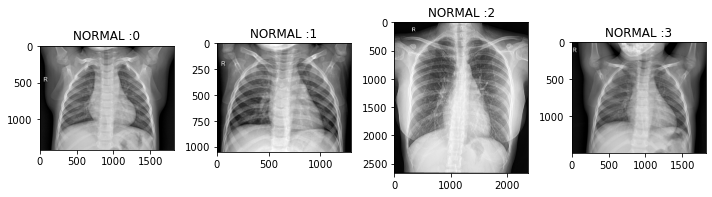

In [7]:
plt.figure(figsize = (10,10))
for i in range(4):
    plt.subplot(1, 4 , i+1)
    img = cv2.imread('pneu/chest_xray/train/NORMAL' + "/" + Normal_train[i])
    plt.imshow(img)
    plt.title('NORMAL :'+ str(i))
    plt.tight_layout()
plt.show()

In [8]:
# Visualization for PNEUMONIA Patients

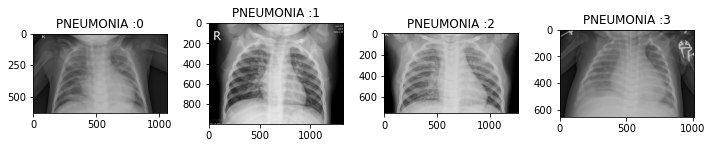

In [9]:
plt.figure(figsize = (10,10))
for i in range(4):
    plt.subplot(1, 4 , i+1)
    img = cv2.imread('pneu/chest_xray/train/PNEUMONIA' + "/" + Pneumonia_train[i])
    plt.imshow(img)
    plt.title('PNEUMONIA :'+str(i))
    plt.tight_layout()
plt.show()

In [10]:
# Read and preprocess images

In [11]:
image_arr_train = []
labels_train = []

for img in Normal_train:
    try:
        image = cv2.imread('pneu/chest_xray/train/NORMAL' + "/" + img)
        image_from_array = Image.fromarray(image, 'RGB')  # Read in the image in colour mode.
        resize_img = image_from_array.resize((150, 150))  # Resizing the image to 150 * 150
        image_arr_train.append(np.array(resize_img))   # converting the image to an array
        labels_train.append(0) # for normal 
        
    except AttributeError:
        print("An error occured while reading the image")

for img in Pneumonia_train:
    try:
        image=cv2.imread('pneu/chest_xray/train/PNEUMONIA'+ "/"+ img)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_img = image_from_array.resize((150, 150))
        image_arr_train.append(np.array(resize_img))
        labels_train.append(1) # for patient with Pneumonia
        
    except AttributeError:
        print("An error occur while reading the image")

In [12]:
# Read and preprocess images

In [13]:
image_arr_val = []
labels_val = []

for img in Normal_val:
    try:
        image = cv2.imread('pneu/chest_xray/val/NORMAL/'+'/' + img)
        image_from_array = Image.fromarray(image, 'RGB')  # Read in the image in colour mode.
        resize_img = image_from_array.resize((150, 150))  # Resizing the image to 150 * 150
        image_arr_val.append(np.array(resize_img))
        labels_val.append(0)
        
    except AttributeError:
        print("An error occured while reading the image")

for img in Pneumonia_val:
    try:
        image=cv2.imread('pneu/chest_xray/val/PNEUMONIA/' +'/'+ img)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_img = image_from_array.resize((150, 150))
        image_arr_val.append(np.array(resize_img))
        labels_val.append(1)
        
    except AttributeError:
        print("An error occur while reading the image")

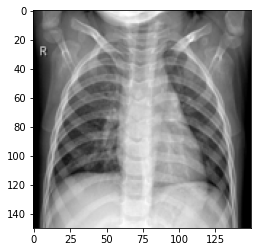

In [14]:
plt.imshow(image_arr_train[1])
plt.show()

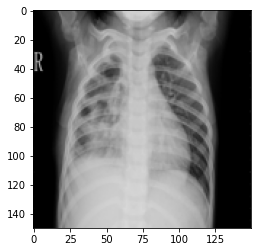

In [15]:
plt.imshow(image_arr_val[-1])
plt.show()

In [18]:
# shuffle images by getting the rows and using np.random for shuffle
# Train

In [19]:
train_data = np.array(image_arr_train)
train_labels = np.array(labels_train)

idx = np.arange(train_data.shape[0])
np.random.shuffle(idx)

train_data = train_data[idx]
train_labels = train_labels[idx]

In [17]:
# Validation

In [18]:
val_data = np.array(image_arr_val)
val_labels = np.array(labels_val)

idx = np.arange(val_data.shape[0])
np.random.shuffle(idx)

val_data = val_data[idx]
val_labels = val_labels[idx]

In [19]:
print("Length of train set {}".format(train_data.shape))
print("Length of val set {}".format(val_data.shape))

Length of train set (5216, 150, 150, 3)
Length of val set (16, 150, 150, 3)


In [ ]:
# modules of interest for the modeling

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten,BatchNormalization,Dropout 
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

In [20]:
Xtrain, Xval, ytrain, yval = train_test_split(train_data, train_labels, test_size=0.2)

batch_size = 24
ntrain = len(train_data)
nval = len(val_data)

In [21]:
print(f'Shape of training image : {Xtrain.shape}')
print(f'Shape of validation image : {Xval.shape}')
print(f'Shape of training labels : {ytrain.shape}')
print(f'Shape of validation labels : {yval.shape}')

Shape of training image : (5163, 150, 150, 3)
Shape of validation image : (53, 150, 150, 3)
Shape of training labels : (5163,)
Shape of validation labels : (53,)


In [ ]:
#  Data Generator creator

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(train_data, train_labels, batch_size=batch_size, shuffle=False)

val_generator = train_datagen.flow(val_data, val_labels, batch_size=8, shuffle=False)

In [23]:
# Building the CNN Model

In [24]:
from keras import optimizers

cnn = Sequential()

cnn.add(Conv2D(512, (3, 3), activation="relu", padding = 'same',input_shape=(150, 150, 3)))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(254, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(128, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())

In [ ]:
# Fully Connected Layers

In [ ]:
cnn.add(Dense(activation = 'relu', units = 512))
cnn.add(Dense(activation = 'relu', units = 128))

cnn.add(Dense(activation = 'sigmoid', units = 1))

In [ ]:
# Compile the Neural network

In [25]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
cnn.compile(optimizer = sgd,loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
 #Plot model

In [27]:
from keras.utils import plot_model
plot_model(cnn, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [28]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 512)     14336     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 254)       1170686   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 254)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       292736    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        7

In [29]:
cnn.fit_generator(train_generator,steps_per_epoch=ntrain//batch_size,epochs=10,
                             validation_data=val_generator, validation_steps=nval//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
217/217 [==============================] - 1709s 8s/step - loss: 0.4776 - accuracy: 0.7812
Epoch 2/10
217/217 [==============================] - 7816s 36s/step - loss: 0.2114 - accuracy: 0.9208
Epoch 3/10
217/217 [==============================] - 2162s 10s/step - loss: 0.1399 - accuracy: 0.9480
Epoch 4/10
217/217 [==============================] - 1965s 9s/step - loss: 0.1227 - accuracy: 0.9563
Epoch 5/10
217/217 [==============================] - 2484s 11s/step - loss: 0.1014 - accuracy: 0.9640
Epoch 6/10
217/217 [==============================] - 5323s 25s/step - loss: 0.0846 - accuracy: 0.9667
Epoch 7/10
217/217 [==============================] - 5955s 27s/step - loss: 0.0748 - accuracy: 0.9725
Epoch 8/10
217/217 [==============================] - 2569s 12s/step - loss: 0.0743 - accuracy: 0.9730
Epoch 9/10
217/217 [==============================] - 2600s 12s/step - loss: 0.0708 - accuracy: 0.9723

LOAD AND USED OUR SAVED MODEL

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# Using the model to predict or validate using the validation set

In [31]:
# predict probabilities for test set
yhat_probs = cnn.predict(Xval, verbose=0)

# predict crisp classes for test set
yhat_classes = cnn.predict_classes(Xval, verbose=0)

# Converting to 1dim array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yval, yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(yval, yhat_classes)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(yval, yhat_classes)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yval, yhat_classes)
print('F1 score: %f' % f1)

# confusion matrix
matrix = confusion_matrix(yval, yhat_classes)
print(matrix)

#classiication report
cp = classification_report(yval, yhat_classes)
print(cp)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.962264
Precision: 1.000000
Recall: 0.950000
F1 score: 0.974359
[[13  0]
 [ 2 38]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.95      0.97        40

    accuracy                           0.96        53
   macro avg       0.93      0.97      0.95        53
weighted avg       0.97      0.96      0.96        53



<AxesSubplot:title={'center':'Confusion Matrix for Pneumonia Model'}>

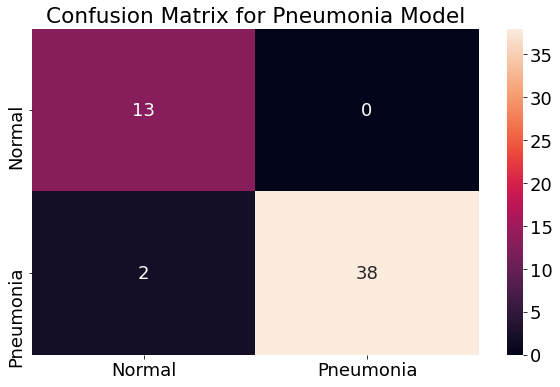

In [32]:
import seaborn as sb
import pandas as pd

columns = ['Normal','Pneumonia']  

cp_df = pd.DataFrame(matrix,columns,columns)                      
plt.figure(figsize=(10,6))  
plt.rcParams.update({'font.size': 18})
plt.title("Confusion Matrix for Pneumonia Model")
sb.heatmap(cp_df, annot=True)


In [39]:
print(cnn.history.history)

{}


In [ ]:
history = cnn.history.history()
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) +1)
plt.rcParams.update({'font.size': 10})

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('(Pneumonia) Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('(Pneumonia) Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model
cnn.save('pneumonia_model.h5')
# cnn.save_weights('pneumonia_model_wieghts.h5')

In [ ]:
# streamlit